#WeatherWizard: A weather prediction ML model

Downloading the data from NOAA (National Ocenic and Atmospheric Administration)

In [1]:
import pandas as pd

weather = pd.read_csv("/Users/atanumondal/Desktop/WeatherWizard-main/data.csv", index_col="DATE")

In [2]:
weather.head()

,STATION,NAME,PRCP,SNWD,TAVG,TMAX,TMIN
DATE,,,,,,,
1975-03-20,IN018103100,"PATIALA, IN",NaN,NaN,66.0,86.0,57.0
1975-03-24,IN018103100,"PATIALA, IN",NaN,NaN,75.0,NaN,55.0
1975-04-06,IN018103100,"PATIALA, IN",NaN,NaN,80.0,NaN,72.0
1975-04-08,IN018103100,"PATIALA, IN",NaN,NaN,76.0,86.0,NaN
1975-04-09,IN018103100,"PATIALA, IN",NaN,NaN,77.0,86.0,59.0


Checking the ratio of null values in each column


In [3]:
weather.shape[0]

16443

In [4]:
weather.apply(pd.isnull).sum()

STATION        0
NAME           0
PRCP        7471
SNWD       16440
TAVG         234
TMAX        2214
TMIN        4832
dtype: int64

In [5]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.454357
SNWD       0.999818
TAVG       0.014231
TMAX       0.134647
TMIN       0.293864
dtype: float64

Picking out core parameters as per documentation and renaming them

In [6]:
core_weather = weather[["PRCP", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow_depth", "temp_max", "temp_min"]

In [7]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.454357
snow_depth    0.999818
temp_max      0.134647
temp_min      0.293864
dtype: float64

In [8]:
core_weather["snow_depth"].value_counts()

3.1    2
7.1    1
Name: snow_depth, dtype: int64

In [9]:
core_weather

,precip,snow_depth,temp_max,temp_min
DATE,,,,
1975-03-20,NaN,NaN,86.0,57.0
1975-03-24,NaN,NaN,NaN,55.0
1975-04-06,NaN,NaN,NaN,72.0
1975-04-08,NaN,NaN,86.0,NaN
1975-04-09,NaN,NaN,86.0,59.0
...,...,...,...,...
2023-08-12,NaN,NaN,97.0,83.0
2023-08-13,NaN,NaN,96.0,82.0
2023-08-14,NaN,NaN,95.0,81.0


In [10]:
del core_weather["snow_depth"]

In [11]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1975-03-20,NaN,86.0,57.0
1975-03-24,NaN,NaN,55.0
1975-04-06,NaN,NaN,72.0
1975-04-08,NaN,86.0,NaN
1975-04-09,NaN,86.0,59.0
...,...,...,...
2023-08-11,NaN,97.0,80.0
2023-08-12,NaN,97.0,83.0
2023-08-13,NaN,96.0,82.0


In [12]:
core_weather["precip"].value_counts() / core_weather.shape[0]

0.00     0.409658
0.02     0.010217
0.04     0.009427
0.08     0.008818
0.12     0.008210
           ...   
7.76     0.000061
0.73     0.000061
1.60     0.000061
10.42    0.000061
5.31     0.000061
Name: precip, Length: 305, dtype: float64

Filling the missing values as 0

In [13]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [14]:
core_weather.apply(pd.isnull).sum()

precip         0
temp_max    2214
temp_min    4832
dtype: int64

In [15]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
1975-04-08,0.00,86.0,NaN
1975-04-12,0.00,95.0,NaN
1975-04-14,0.00,95.0,NaN
1975-04-20,0.00,NaN,NaN
1975-04-22,0.00,NaN,NaN
...,...,...,...
2023-07-27,0.00,95.0,NaN
2023-07-30,0.00,94.0,NaN
2023-08-02,0.00,98.0,NaN


In [16]:
core_weather = core_weather.fillna(method="ffill")

In [17]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [18]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [19]:
core_weather.index

Index(['1975-03-20', '1975-03-24', '1975-04-06', '1975-04-08', '1975-04-09',
       '1975-04-12', '1975-04-13', '1975-04-14', '1975-04-15', '1975-04-17',
       ...
       '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10', '2023-08-11',
       '2023-08-12', '2023-08-13', '2023-08-14', '2023-08-15', '2023-08-16'],
      dtype='object', name='DATE', length=16443)

Converting date from object datatype to datetime

In [20]:
core_weather.index = pd.to_datetime(core_weather.index)

In [21]:
core_weather.index

DatetimeIndex(['1975-03-20', '1975-03-24', '1975-04-06', '1975-04-08',
               '1975-04-09', '1975-04-12', '1975-04-13', '1975-04-14',
               '1975-04-15', '1975-04-17',
               ...
               '2023-08-07', '2023-08-08', '2023-08-09', '2023-08-10',
               '2023-08-11', '2023-08-12', '2023-08-13', '2023-08-14',
               '2023-08-15', '2023-08-16'],
              dtype='datetime64[ns]', name='DATE', length=16443, freq=None)

In [22]:
core_weather.index.year

Int64Index([1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975, 1975,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=16443)

Checking for any data that has not been received

In [23]:
core_weather.apply(lambda x:(x==9999)).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

Analysing the data

<AxesSubplot:xlabel='DATE'>

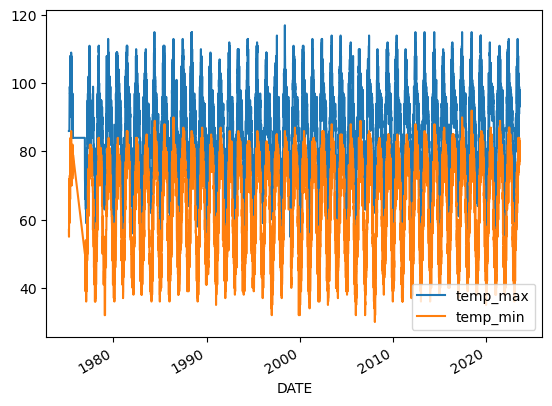

In [24]:
core_weather[["temp_max", "temp_min"]].plot()

In [25]:
core_weather.index.year.value_counts().sort_index()

1975    102
1976     15
1977    365
1978    365
1979    317
1980    366
1981    365
1982    365
1983    365
1984    366
1985    326
1986    317
1987    354
1988    325
1989    319
1990    269
1991    343
1992    352
1993    291
1994    318
1995    312
1996    342
1997    329
1998    348
1999    351
2000    362
2001    363
2002    360
2003    363
2004    361
2005    360
2006    362
2007    356
2008    364
2009    361
2010    357
2011    358
2012    366
2013    365
2014    365
2015    365
2016    363
2017    362
2018    364
2019    364
2020    366
2021    361
2022    360
2023    228
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

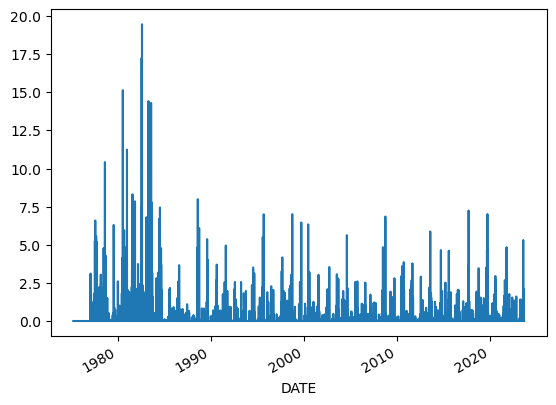

In [26]:
core_weather["precip"].plot()

Year-wise rain count

In [27]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1975      0.00
1976      0.00
1977     96.64
1978     79.53
1979     13.06
1980     96.22
1981     65.76
1982    101.89
1983    114.35
1984     72.83
1985     20.81
1986     19.56
1987      7.74
1988     27.33
1989     17.85
1990     19.00
1991     26.26
1992     23.96
1993     13.31
1994     27.69
1995     37.41
1996     26.10
1997     20.78
1998     29.14
1999     17.73
2000     24.73
2001     14.10
2002     15.84
2003     24.30
2004     23.06
2005     19.32
2006     11.88
2007     13.52
2008     45.40
2009     18.48
2010     34.12
2011     28.07
2012     13.22
2013     25.55
2014     20.01
2015     29.18
2016     13.91
2017     29.99
2018     31.03
2019     30.88
2020     29.43
2021     25.37
2022     17.44
2023     24.88
Name: precip, dtype: float64

<AxesSubplot:xlabel='DATE'>

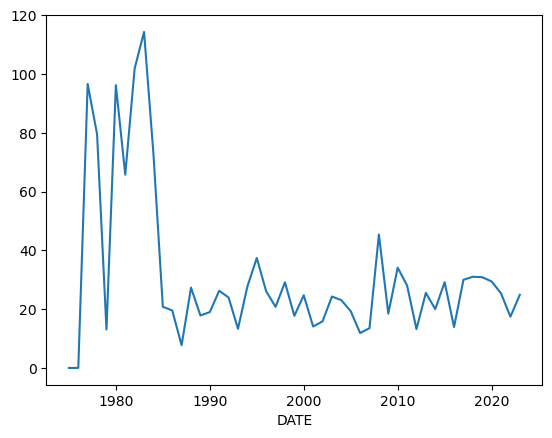

In [28]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

Training Machine learning model

In [29]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [30]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1975-03-20,0.0,86.0,57.0,86.0
1975-03-24,0.0,86.0,55.0,86.0
1975-04-06,0.0,86.0,72.0,86.0
1975-04-08,0.0,86.0,72.0,86.0
1975-04-09,0.0,86.0,59.0,95.0
...,...,...,...,...
2023-08-12,0.0,97.0,83.0,96.0
2023-08-13,0.0,96.0,82.0,95.0
2023-08-14,0.0,95.0,81.0,97.0


Removing last row, because the target value cannot be predicted for that

In [31]:
core_weather = core_weather.iloc[:-1,:].copy()

In [32]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1975-03-20,0.0,86.0,57.0,86.0
1975-03-24,0.0,86.0,55.0,86.0
1975-04-06,0.0,86.0,72.0,86.0
1975-04-08,0.0,86.0,72.0,86.0
1975-04-09,0.0,86.0,59.0,95.0
...,...,...,...,...
2023-08-11,0.0,97.0,80.0,97.0
2023-08-12,0.0,97.0,83.0,96.0
2023-08-13,0.0,96.0,82.0,95.0


In [33]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [34]:
predictors = ["precip", "temp_max", "temp_min"]

In [35]:
train = core_weather.loc[:"1995-12-31"]
test = core_weather.loc["1996-01-01":]

In [36]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1975-03-20,0.0,86.0,57.0,86.0
1975-03-24,0.0,86.0,55.0,86.0
1975-04-06,0.0,86.0,72.0,86.0
1975-04-08,0.0,86.0,72.0,86.0
1975-04-09,0.0,86.0,59.0,95.0
...,...,...,...,...
1995-12-27,0.0,66.0,46.0,66.0
1995-12-28,0.0,66.0,43.0,71.0
1995-12-29,0.0,71.0,43.0,67.0


In [37]:
test

,precip,temp_max,temp_min,target
DATE,,,,
1996-01-01,0.0,70.0,46.0,70.0
1996-01-02,0.0,70.0,46.0,69.0
1996-01-03,0.0,69.0,46.0,70.0
1996-01-04,0.0,70.0,40.0,69.0
1996-01-05,0.0,69.0,40.0,69.0
...,...,...,...,...
2023-08-11,0.0,97.0,80.0,97.0
2023-08-12,0.0,97.0,83.0,96.0
2023-08-13,0.0,96.0,82.0,95.0


In [38]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [39]:
predictions = reg.predict(test[predictors])

DATE
1996-01-01    70.0
1996-01-02    69.0
1996-01-03    70.0
1996-01-04    69.0
1996-01-05    69.0
              ... 
2023-08-11    97.0
2023-08-12    96.0
2023-08-13    95.0
2023-08-14    97.0
2023-08-15    98.0
Name: target, Length: 9925, dtype: float64

array([70.53656512, 70.53656512, 69.63784714, ..., 96.15874759,
       95.19737642, 96.99481237])

In [40]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

8.788417344466326

Evaluating the model

In [41]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [42]:
combined

,actual,predictions
DATE,,
1996-01-01,70.0,70.536565
1996-01-02,69.0,70.536565
1996-01-03,70.0,69.637847
1996-01-04,69.0,70.160646
1996-01-05,69.0,69.261928
...,...,...
2023-08-11,97.0,96.932159
2023-08-12,96.0,97.120119
2023-08-13,95.0,96.158748


<AxesSubplot:xlabel='DATE'>

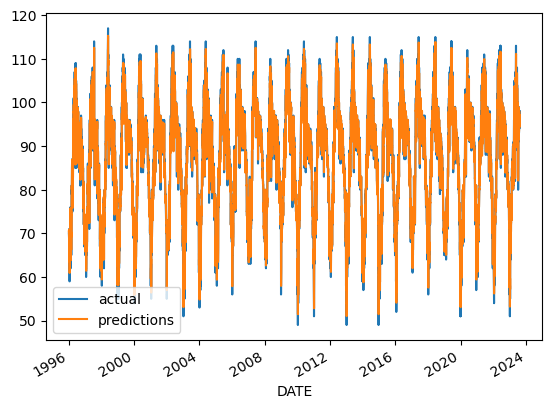

In [43]:
combined.plot()

In [44]:
reg.coef_

array([0.11939555, 0.89871798, 0.0626532 ])

In [45]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

Creating a function to make predictions

In [46]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)

    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

Adding rolling means

In [47]:
core_weather["month_max"]=core_weather["temp_max"].rolling(30).mean()

In [48]:
core_weather["month_day_max"]=core_weather["month_max"]/core_weather["temp_max"]

In [49]:
core_weather["max_min"]=core_weather["temp_max"]/core_weather["temp_min"]

In [50]:
predictors=["precip","temp_max","temp_min","month_max","month_day_max","max_min"]

In [51]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1975-03-20,0.0,86.0,57.0,86.0,NaN,NaN,1.508772
1975-03-24,0.0,86.0,55.0,86.0,NaN,NaN,1.563636
1975-04-06,0.0,86.0,72.0,86.0,NaN,NaN,1.194444
1975-04-08,0.0,86.0,72.0,86.0,NaN,NaN,1.194444
1975-04-09,0.0,86.0,59.0,95.0,NaN,NaN,1.457627
...,...,...,...,...,...,...,...
2023-08-11,0.0,97.0,80.0,97.0,95.433333,0.983849,1.212500
2023-08-12,0.0,97.0,83.0,96.0,95.633333,0.985911,1.168675
2023-08-13,0.0,96.0,82.0,95.0,95.733333,0.997222,1.170732


Removing the first 30 null values

In [52]:
core_weather=core_weather.iloc[30:,:].copy()

In [53]:

error, combined = create_predictions(predictors, core_weather, reg)
error

9.394199515897826

<AxesSubplot:xlabel='DATE'>

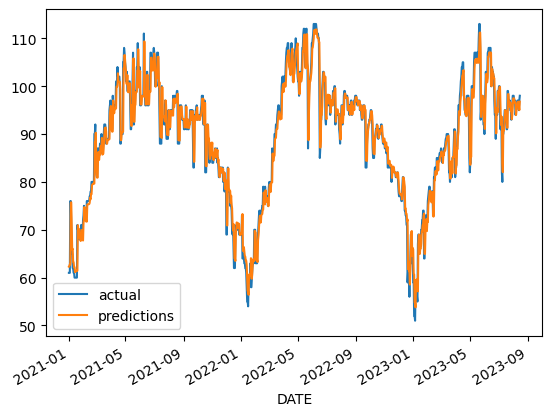

In [54]:
combined.plot()

In [55]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.dayofyear).apply(lambda x: x.expanding(1).mean())

Running model diagnosis

In [56]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], core_weather, reg)
error

9.17710640507501

In [57]:
reg.coef_

array([-0.1105547 ,  0.7241649 ,  0.0106958 ,  0.00745964, -2.33180357,
        0.64160069,  0.06428734,  0.19847363])

In [58]:
core_weather.corr()["target"] #this shows how column are corelated to target

precip            -0.000008
temp_max           0.966175
temp_min           0.829905
target             1.000000
month_max          0.879336
month_day_max     -0.337142
max_min           -0.385202
monthly_avg        0.908880
day_of_year_avg    0.929737
Name: target, dtype: float64

In [59]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [60]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2022-05-23,87.0,104.048278,17.048278
2022-06-17,85.0,99.650131,14.650131
2021-05-18,92.0,106.502757,14.502757
2023-05-24,93.0,107.182790,14.182790
2021-01-04,76.0,61.960986,14.039014
2021-10-17,82.0,95.489797,13.489797
2021-04-26,105.0,92.318250,12.681750
2022-12-20,59.0,70.854170,11.854170
2023-07-08,82.0,93.818055,11.818055
